In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

In [2]:
!ls ./CA_Counties

CA_Counties_TIGER2016.cpg     CA_Counties_TIGER2016.sbx
CA_Counties_TIGER2016.dbf     CA_Counties_TIGER2016.shp
CA_Counties_TIGER2016.prj     CA_Counties_TIGER2016.shp.xml
CA_Counties_TIGER2016.sbn     CA_Counties_TIGER2016.shx


In [3]:
shp_path = "./CA_Counties/CA_Counties_TIGER2016.shp"
sf = shp.Reader(shp_path)

In [4]:
print ('number of shapes imported:',len(sf.shapes()))

number of shapes imported: 58


In [5]:
sf.records()[1]

Record #1: ['06', '067', '00277298', '06067', 'Sacramento', 'Sacramento County', '06', 'H1', 'G4020', '472', '40900', '', 'A', 2499183617, 76073827, '+38.4500114', '-121.3404409']

In [6]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [7]:
df = read_shapefile(sf)
df.shape

(58, 18)

In [8]:
df.sample(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,coords
13,06,035,01693324,06035,Lassen,Lassen County,06,H1,G4020,,45000,,A,11761603010,463438616,+40.7210862,-120.6299518,"[(-13505494.737313336, 4961581.116898506), (-1..."
56,06,021,00277275,06021,Glenn,Glenn County,06,H1,G4020,,,,A,3403104376,33749275,+39.6025462,-122.4016998,"[(-13680158.034949364, 4814470.617666174), (-1..."
40,06,077,00277303,06077,San Joaquin,San Joaquin County,06,H1,G4020,488,44700,,A,3606276598,89025932,+37.9349815,-121.2722440,"[(-13492801.940349977, 4614635.904178459), (-1..."
48,06,025,00277277,06025,Imperial,Imperial County,06,H1,G4020,,20940,,A,10817291640,790230304,+33.0408143,-115.3554001,"[(-12839095.428410124, 3852391.8506310633), (-..."
22,06,095,00277312,06095,Solano,Solano County,06,H1,G4020,488,46700,,A,2128380148,218647027,+38.2672255,-121.9395940,"[(-13588190.514372332, 4624150.922337844), (-1..."


In [9]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]

    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [35]:
# Plot Comuna
Name = 'Alameda'
com_id = df[df.NAME == 'Alameda'].index.get_values[0]
plot_shape(com_id, Name)

AttributeError: 'Int64Index' object has no attribute 'get_values'

In [12]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map withlim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

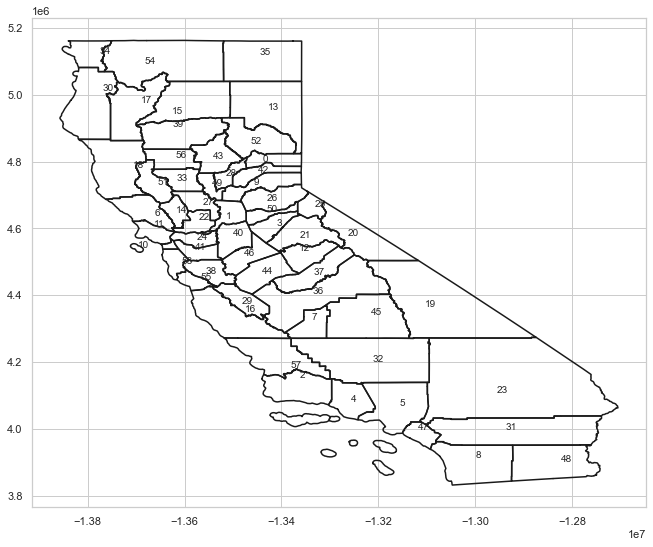

In [13]:
plot_map(sf)


In [14]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [15]:
def plot_comunas_3(sf, title, comunas, data, color=None):
    '''
    Plot map with selected comunes, using specific color
    '''
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = conv_comuna(i).upper()
        comuna_id.append(df[df.NOM_COMUNA == i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_3(sf, title, comuna_id,  color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9));

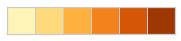

In [16]:
colors = sns.color_palette('YlOrBr', n_colors=6)
sns.palplot(colors, 0.5)

<Figure size 792x648 with 0 Axes>

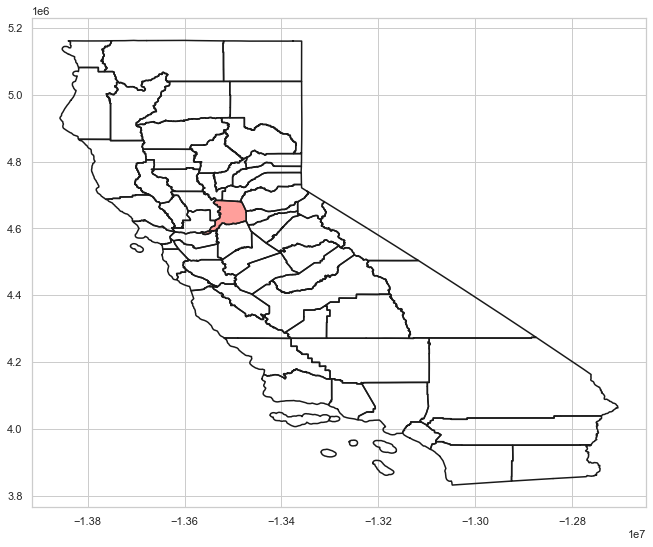

In [17]:
plot_map_fill(1,sf)

In [18]:
road_path = "./CA_Fire_History_1950_2018/data/commondata/wildfire_risk_sn_roadless/Cal_Hist_1950_2018.shp"
fires = gpd.read_file(road_path, encoding='utf-8')
fires.size
fires_df = gpd.GeoDataFrame(fires, crs= 'epsg:3310')

In [109]:
shp_path = "./CA_Counties/CA_Counties_TIGER2016.shp"
CA_counties = gpd.read_file(shp_path, encoding='utf-8')
#CA_counties

In [103]:
from shapely.geometry import Polygon
Sangramento = CA_counties[CA_counties.NAME == 'Sacramento']
#stgo_shape = gpd.GeoDataFrame(Sangramento, crs= 'epsg:3310')
stgo_shape = gpd.GeoDataFrame.to_crs(Sangramento, crs= 'epsg:3310')
stgo_shape

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-103238.115 78232.167, -103128.738 7..."


In [104]:
res_union = gpd.overlay(stgo_shape, fires, how='intersection')

In [105]:
print(res_union.shape[0])
#res_union

48


In [87]:
CA_counties[CA_counties.NAME == CA_counties.NAME[0]]

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."


In [110]:
#stgo_shape = CA_counties.cx[:,:0]
#Sangramento = CA_counties[CA_counties.id == 0]
#stgo_shape = gpd.GeoDataFrame(Sangramento, crs= 'epsg:3310')
county_fires = []
for index, row in CA_counties.T.iteritems():#iterrows():
    county = CA_counties[CA_counties.NAME == row.NAME]
    #stgo_shape = gpd.GeoDataFrame(row, crs= 'epsg:3310')
    #print(row.NAME)
    stgo_shape = gpd.GeoDataFrame.to_crs(county, crs= 'epsg:3310')
    #print(stgo_shape)
    #print(row)
    county_fire = gpd.overlay(stgo_shape, fires, how='intersection')
    county_fires.append(county_fire)
    print("succuess:"+row.NAME)
stgo_shape

succuess:Sierra
succuess:Sacramento
succuess:Santa Barbara
succuess:Calaveras
succuess:Ventura
succuess:Los Angeles
succuess:Sonoma
succuess:Kings
succuess:San Diego
succuess:Placer
succuess:San Francisco
succuess:Marin
succuess:Mariposa
succuess:Lassen
succuess:Napa
succuess:Shasta
succuess:Monterey
succuess:Trinity
succuess:Mendocino
succuess:Inyo
succuess:Mono
succuess:Tuolumne
succuess:Solano
succuess:San Bernardino
succuess:Contra Costa
succuess:Alpine
succuess:El Dorado
succuess:Yolo
succuess:Yuba
succuess:San Benito
succuess:Humboldt
succuess:Riverside
succuess:Kern
succuess:Colusa
succuess:Del Norte
succuess:Modoc
succuess:Fresno
succuess:Madera
succuess:Santa Clara
succuess:Tehama
succuess:San Joaquin
succuess:Alameda
succuess:Nevada
succuess:Butte
succuess:Merced
succuess:Tulare
succuess:Stanislaus
succuess:Orange
succuess:Imperial
succuess:Sutter
succuess:Amador
succuess:Lake
succuess:Plumas
succuess:San Mateo
succuess:Siskiyou
succuess:Santa Cruz
succuess:Glenn
succuess:San

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
57,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County,06,H1,G4020,None,42020,None,A,8548640337,815490673,+35.3852242,-120.4475445,"POLYGON ((-106989.755 -246316.174, -106951.123..."


In [115]:
county_fires[0].shape[0]

83

In [123]:
len(county_fires)

58

In [128]:
county_fires[0].NAME[0]

'Sierra'

In [133]:
counties = []
fires_nums = []
for fire in county_fires:
    #print(fire.NAME[0]+":")
    counties.append(fire.NAME[0])
    #print(fire.shape[0])
    fires_nums.append(fire.shape[0])
#    fire.shape[0]

In [145]:
df2 = pd.DataFrame({'county_name': counties,'fire_count' : fires_nums})

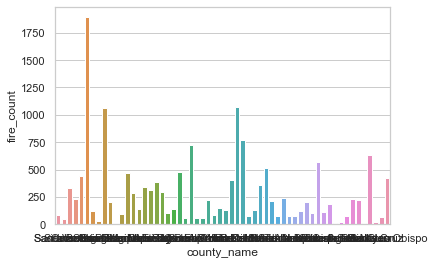

In [147]:
ax = sns.barplot(x="county_name", y="fire_count", data=df2)

In [148]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = conv_comuna(i).upper()
        comuna_id.append(df[df.NOM_COMUNA == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [155]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [153]:
def calc_color(data, color=None):
        if color   == 1:
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            
            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

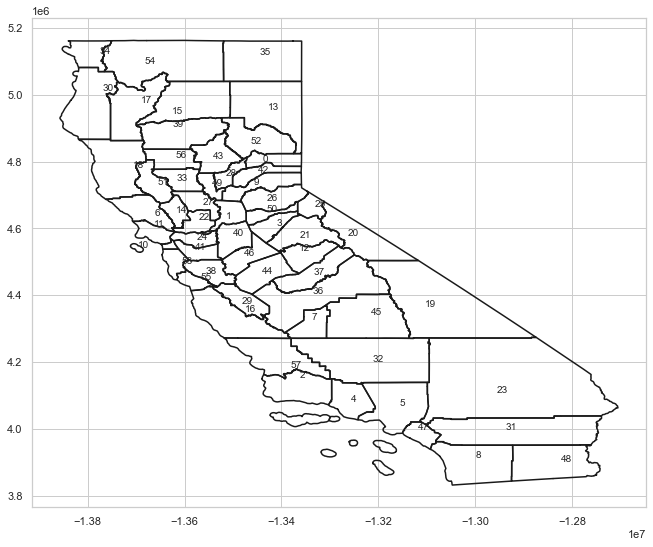

<Figure size 792x648 with 0 Axes>

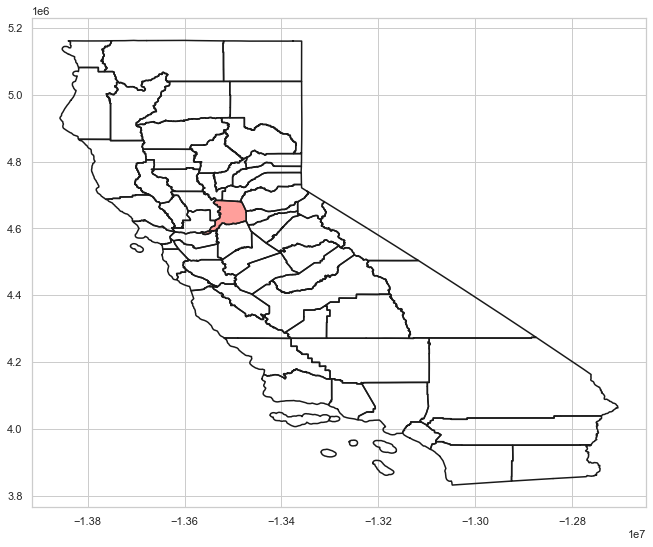

In [162]:
plot_map(sf)
plot_map_fill(1,sf)

In [166]:
CA_counties['fire_number'] = fires_nums


1: 1 => 61 
2: 62 => 100 
3: 101 => 165 
4: 166 => 287 
5: 288 => 452 
6: 453 => 1892 

   1   2   3   4   5   6


NameError: name 'conv_comuna' is not defined

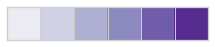

In [167]:
color_pallete = 1 # 'Purples'
plot_comunas_data(sf, 'fire_frequency', counties, fires_nums, color_pallete, "False")

In [159]:
import geoplot

ModuleNotFoundError: No module named 'geoplot'

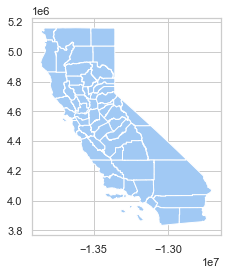

In [165]:
CA_counties.plot()

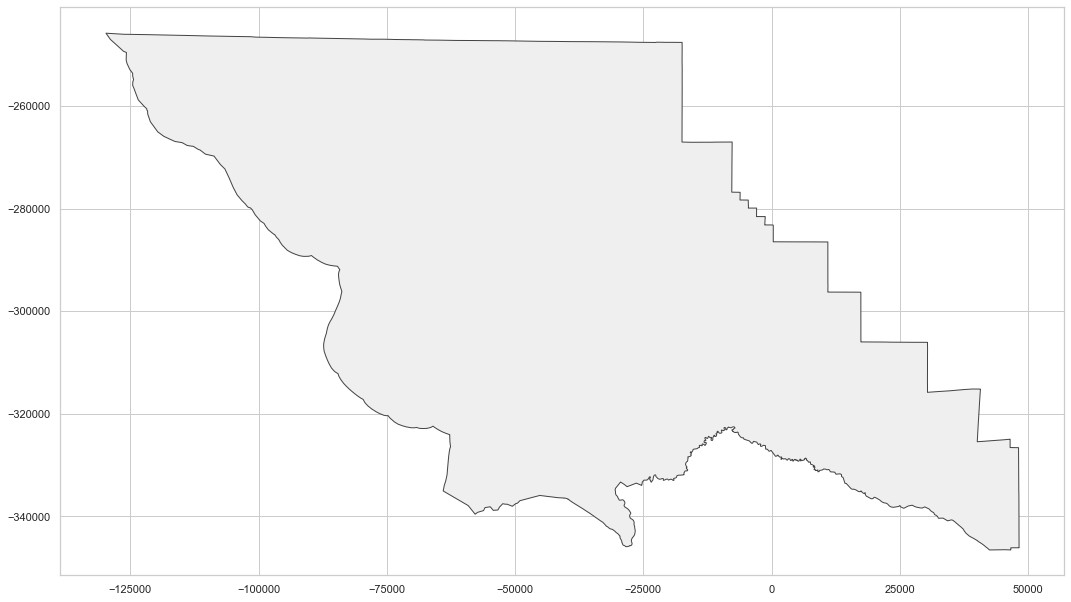

In [164]:
stgo_shape.plot(figsize=(18,16), color='#EFEFEF', edgecolor='#444444')

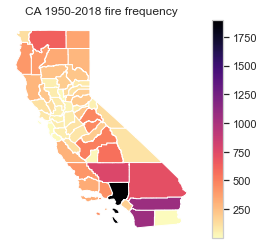

In [169]:
ax = CA_counties.plot(column='fire_number', cmap='magma_r', k=5, legend=True)
plt.title("CA 1950-2018 fire frequency");
ax.set_axis_off()